# NLP Using Wikidata Knowledge Graph 

# Imports

In [30]:
import requests                           # Library needed to send HTTP requests to APIS
import pandas as pd                       # Library for pandas dataframes  
import copy                               # Library needed to create deep copys
import nltk                               # Natural Language Processing library           
import re                                 # Library needed to remove HTML tags from text            
from nltk.corpus import stopwords         # Library needed to remove stopwords from text
from nltk.tokenize import RegexpTokenizer # Library needed to remove punctuation 
from nltk.stem import *                   # Library for steeming 
from nltk.corpus import wordnet           # Library for synonyms and adonyms
import operator                           # Library needed to get items of a dictionary sorted by their values
import matplotlib.pyplot as plt           # Library needed to create plots
import numpy as np                        # Library for numpy arrays 
import warnings                           # Ignore warnings 
warnings.filterwarnings("ignore")         # There were some warnings related to plotting formating options

## Set API call

In [31]:
# For this task I used information from this link:
# URL: https://stackoverflow.com/questions/55961615/how-to-integrate-wikidata-query-in-python
# Author: Abbe

def get_turing_award_recipients()->list:
    """
    Return a list of WikiData entities of humans which won the ACM Turing Award.

    :return: The list will consist of items of type `str` of the form QXXXX.
    """

    url = 'https://query.wikidata.org/sparql' # We define the main part of the end point for our request
    # We define what query we want to run and we include the parameters for ACM winners
    query = '''
    SELECT ?person

    WHERE {
        ?person wdt:P166 wd:Q185667 .

        }

            '''
    r = requests.get(url, params = {'format': 'json', 'query': query}) # We send the request
    df = r.json()  # Get the data in json format 
    
    
    # Get from the json file the entities that we are interested in.
    df = df['results']['bindings']
    Turing_Winners_Entities = []
    for item in df:
        temp = item['person']['value'].split('/')[-1]  # From the json formated file we get the entity IDs
        Turing_Winners_Entities.append(temp)
    
    return Turing_Winners_Entities

# Run the function to get the ACM turing award winners 
ACM_Turing_Award_Winners = get_turing_award_recipients()

In [32]:
# For this one I used info from here: 
# https://stackoverflow.com/questions/31462854/how-to-get-a-page-actual-content-using-page-id-in-wikipedia-api
# Author: Shreyas Chavan

def get_wikipedia_content(Wikidata_id):
    """
    Get the Wikipedia page content given the EntityID.

    :param Wikidata_id: The  Entity id for the page that we want the content from.
    :return: Τhe content of the English Wikipedia page for the entity.
    """
    # We define our URL for the request
    URL = "http://www.wikidata.org/w/api.php?action=wbgetentities&ids={}&props=labels|descriptions|claims&languages=en&languagefallback=&sitefilter=enwiki&format=json".format(Wikidata_id)
    R = requests.get(url=URL)  # Send the request
    DATA = R.json()  # Given the input Entidy ID we retrieve all the information from the WikiData Website 
    return DATA

In [33]:
# For each ACM Turing Award winner we get the WIKI data page.

html_content_winners = []  # List of json formated results for each ACM. Data are taken from Wikidata
for winner in ACM_Turing_Award_Winners:  # We itterate over the list of Entity IDs
    html_content_winners.append(get_wikipedia_content(winner))
    

# For the attribures we store the list in the corresponding value of the dictionary.
# Every attribute corresponds to a specific P value but not all entities can have all the attributes.
# Next we need to create a dictionary called 'award_winners' which contains the following fields:
# 1) name         -> Name of the ACM winner
# 2) intro        -> Intro page in wikipedia  
# 3) gender       -> Gender of the winner (Attribute code: P21)
# 4) birth date   -> Birth date of the winner (Attribute code: P569)
# 5) birth place  -> Birth place of the winner (Attribute code: P19)
# 6) employer     -> Employeer of the winner (Attribute code: P108)
# 7) educated_at  -> Education history of the winner (Attribute code: P69)



# Initialize our dictionary: award winners
award_winners = {
    
    'name'       : [],
    'intro'      : [],
    'gender'     : [],
    'birth_date' : [],
    'birth_place': [],
    'employer'   : [],
    'educated_at': [],
}

for index, award_winner in enumerate(html_content_winners):
    
    # Add name of each winner to the dictionary
    name = ''
    try:
        name = award_winner['entities'][ACM_Turing_Award_Winners[index]]['labels']['en']['value'] # This is the path to obtain the name from json file
    except:  # Name not found
        pass   
    if name:  # If we have found the name, we add it to the corresponding list in the dictionary
        award_winners['name'].append(name)
    else:  # Otherwise add None
        award_winners['name'].append(None)
            
    # Add gender information
    gender = ''
    try:
        gender = award_winner['entities'][ACM_Turing_Award_Winners[index]]['claims']['P21'] # This is the path to obtain the gender from json file
    except: # Gender not found
        pass
    if gender: # If we have found the gender, we add it to the corresponding list in the dictionary
        award_winners['gender'].append(gender)
    else: # Otherwise add None
        award_winners['gender'].append(None)
        
    # Add birth_date information
    birth_date = ''
    try:
        birth_date = award_winner['entities'][ACM_Turing_Award_Winners[index]]['claims']['P569'] # Path for birth_date info
    except:
        pass
    if birth_date: # If we have found the birth date, we add it to the corresponding list in the dictionary
        award_winners['birth_date'].append(birth_date)
    else: # Otherwise add None
        award_winners['birth_date'].append(None)
    
    # Add birth_place information
    birth_place = ''
    try:
        birth_place = award_winner['entities'][ACM_Turing_Award_Winners[index]]['claims']['P19']  # Path for birth_place
    except:
        pass
    if birth_place: # If we have found the birth_place, we add it to the corresponding list in the dictionary
        award_winners['birth_place'].append(birth_place)
    else: # Otherwise add None
        award_winners['birth_place'].append(None)
        
     # Add employer information
    employer = ''
    try:
        employer = award_winner['entities'][ACM_Turing_Award_Winners[index]]['claims']['P108']  # Path to employeer attribute
    except:
        pass
    if employer: # If we have found the employer, we add it to the corresponding list in the dictionary
        award_winners['employer'].append(employer)
    else: # Otherwise add None
        award_winners['employer'].append(None)
        
    # Add educated_at information
    educated_at = ''
    try:
        educated_at = award_winner['entities'][ACM_Turing_Award_Winners[index]]['claims']['P69']  # Path for educated at
    except:
        pass
    if educated_at:  # If we have found the education history, we add it to the corresponding list in the dictionary
        award_winners['educated_at'].append(educated_at)
    else:  # Otherwise add None
        award_winners['educated_at'].append(None)

# Lastly for each award winner we need to set the intro section on the dictionary to the first paragraph in wikipedia page.
winner_names = award_winners['name'] # Get the names of the winners 
for person in winner_names:  # For each person we extract the information that we need
    person_name = person
    #  Fix cases where the winner name does not match their corresponding wikipedia page title
    if person_name == 'Iosif Sifakis':
        person_name = 'Joseph Sifakis'
    if person_name == 'Jim Gray':
        person_name = 'Jim Gray (computer scientist)'
    if person_name == 'John McCarthy':
        person_name = 'John McCarthy (computer scientist)'
    # Create our URL based on the ACM winner
    URL = "https://en.wikipedia.org/w/api.php?format=json&action=query&prop=extracts&exintro&redirects=1&titles={}".format(person_name)
    R = requests.get(url=URL)  # Send request to wikidata API to get the intro in HTML format
    # I chose to get the intro including the html tags (instead of plain text) as I wanted to get advantage of 
    # the tags in order to count the number of paragraphs.
    DATA = R.json()  # Convert the output into json
    page_id = list(DATA['query']['pages'].keys())
    text = ''
    try:  # For each ACM winner we extract the intro 
        text = DATA['query']['pages'][page_id[0]]['extract']  # Path for HTML formated intro text
        text = text.split("<!--")[0]  # Drop the NewPP parser report. This was additional unrelated text.
    except:
        pass
    if text: # If we have found the introduction append it.
        award_winners['intro'].append(text)
    else:  # Otherwise append None
        award_winners['intro'].append(None)


## Print ACM award winners

In [34]:
# Print the names of award winners in alphabetical order 
winners_names = copy.deepcopy(award_winners['name'])  # Assign the names of the award winners from the dictionary to a list.
                                                      # I used a deep copy as I didn't want the sort to affect the original dataframe
winners_names.sort()  # Sort the list.
print('The ACM award winners are: ')
for index, person in enumerate(winners_names):
    print('{}. {}'.format(index+1, person))

The ACM award winners are: 
1. Adi Shamir
2. Alan Kay
3. Alan Perlis
4. Alfred Aho
5. Allen Newell
6. Amir Pnueli
7. Andrew Yao
8. Barbara Liskov
9. Bob Kahn
10. Butler Lampson
11. Charles Bachman
12. Charles P. Thacker
13. Dana Scott
14. David A. Patterson
15. Dennis M. Ritchie
16. Donald Knuth
17. Douglas Engelbart
18. E. Allen Emerson
19. Edgar F. Codd
20. Edmund M. Clarke
21. Edsger W. Dijkstra
22. Edward Feigenbaum
23. Edwin Catmull
24. Fernando J. Corbató
25. Frances E. Allen
26. Fred Brooks
27. Geoffrey Hinton
28. Herbert Simon
29. Iosif Sifakis
30. Ivan Sutherland
31. Jack Dongarra
32. James H. Wilkinson
33. Jeffrey David Ullman
34. Jim Gray
35. John Backus
36. John Cocke
37. John Edward Hopcroft
38. John L. Hennessy
39. John McCarthy
40. Judea Pearl
41. Juris Hartmanis
42. Ken Thompson
43. Kenneth E. Iverson
44. Kristen Nygaard
45. Leonard Adleman
46. Leslie Lamport
47. Leslie Valiant
48. Manuel Blum
49. Martin Edward Hellman
50. Marvin Minsky
51. Maurice Wilkes
52. Michael O.

## Feature engineering

In [35]:
award_winners_intro = pd.DataFrame(award_winners, columns = ['name', 'intro'])  # First we need to get the 2 columns that we need.
award_winners_intro.rename(columns={'name': 'winner_name'}, inplace=True)  # Rename name column to winner_name

# Create the rest of the variables in this dataframe
# count_words, count_sentences, count_paragraphs, common_words

###############################
### Define: Help Functions ####
###############################

def remove_html_tags(text: str)-> str:
    """ Remove html tags from input text.
    
    :param text: Input text of type `str` that we want to remove html tags.
    :return cleaned: The text without the HTML tags.
    """
    filter_html = re.compile('<.*?>')  # Create a filter to remove html tags 
    cleaned = re.sub(filter_html, '',text) # Remove html characters from text
    return cleaned


def nltk_count(text: str, tokenize_type: str) -> int:
    """ Count the number of words/senteces/paragraphs in the input text.
    
    :param text: The input text of type `str`.
    :param tokenize_type: The granularity level of the structure that we want to look for.
    :return: The number of words/senteces/paragraphs in the input text.
    """
    tokens = []  
    if text is not None:  # If an intro paragraph was found in Wikipedia
        if tokenize_type =='words':  # Count the number of words
            text = remove_html_tags(text)  # Remove html characters in order not to inflate the results.
            tokens = nltk.word_tokenize(text)  # Tokenize the text
            return len(tokens)  # Return the number of words
        elif tokenize_type =='sentences': # Count the number of sentences.
            return text.count('.')  # In order to cound the number of sentences I counted the number of '.' as I saw that it performed better compared to the nltk built in method
        else:  # Count the number of paragraphs.
               # New paragraph is created using the html character <p> , in the text. So in order to find the number 
               # of paragraphs we need to find the number of occurences of this combination of symbols-characters.
            return text.count('<p>')
    else:  # If an intro paragraph was not found in Wikipedia return 0
        return 0
    
    
# For this function I used info from the following 
# URL: https://stackoverflow.com/questions/28392860/print-10-most-frequently-occurring-words-of-a-text-that-including-and-excluding
# Author: igorushi
def count_common_words(text: str, n: int, process = False) ->list:
    """ 
    Return the number of n most common words from the text. 
    
    :param text: The input text of type `str`.
    :param n: The number of most common words to return of type `int`.
    :process: Indicator of whether to include stop words and punctuation. The default value is False.
    :return: A `list` with the n most common words.
    """
    if text is not None:
        if process == False:  # List of most frequent words including the stop words and punctuaction.
            text   = remove_html_tags(text)  # Remove html characters in order not to inflate the results.
            tokens = nltk.tokenize.word_tokenize(text)  # Tokenize the text
            fdist  = nltk.FreqDist(word.lower() for word in tokens) # We convert each word to lower case and find its frequency
            common_words =  fdist.most_common(n)
            return [x[0] for x in common_words] # Return only the words and not the frequencies
        else:  # List of most frequent words by not including the stop words
            text      = remove_html_tags(text)  # Remove html characters in order not to inflate the results.
            tokenizer = RegexpTokenizer(r'\w+')  # Do not include punctuation in the tokenized result.
            tokens    = tokenizer.tokenize(text)
            stopwords_list = stopwords.words('english')  # Get the English stop words
            fdist     = nltk.FreqDist(word.lower() for word in tokens if word not in stopwords_list)  # Get distribution of valid words
            common_words =  fdist.most_common(n)
            return [x[0] for x in common_words]  # Return only the words and not the frequencies
    else:
        return None
    
    
###############################
### END OF HELP FUNCTIONS #####
###############################

# Apply the above functions to calculate the corresponding columns
award_winners_intro['count_words']      = award_winners_intro['intro'].apply(nltk_count,tokenize_type='words')
award_winners_intro['count_sentences']  = award_winners_intro['intro'].apply(nltk_count,tokenize_type='sentences')
award_winners_intro['count_paragraphs'] = award_winners_intro['intro'].apply(nltk_count,tokenize_type='paragraphs')
award_winners_intro['common_words']     = award_winners_intro['intro'].apply(count_common_words, n= 10)
# Column common_words_after_preprocessing does not include punctuation and stopwords.
award_winners_intro['common_words_after_preprocessing'] =  award_winners_intro['intro'].apply(count_common_words, process = True, n= 10)

awards_intro = copy.deepcopy(award_winners_intro)  # Create a copy of this dataset as we are going to need it afterwards.
award_winners_intro = award_winners_intro.drop(['intro'], axis=1)  # Drop 'intro' column from dataframe 
award_winners_intro.head(10)  # Show first 10 rows of the dataset.

,winner_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing
0,Tim Berners-Lee,405,17,4,"[the, of, ., and, web, he, ,, a, is, (]","[web, he, world, wide, berners, lee, computer,..."
1,Edsger W. Dijkstra,121,4,2,"[,, the, ., was, award, of, his, in, dijkstra, (]","[award, dijkstra, dutch, 2002, computer, scien..."
2,Frances E. Allen,81,4,1,"[,, and, the, ., was, in, to, allen, august, 4]","[allen, august, 4, compilers, first, woman, ib..."
3,Shafrira Goldwasser,80,2,1,"[of, the, and, ,, at, is, computer, scientist,...","[computer, scientist, professor, science, inst..."
4,Donald Knuth,206,8,3,"[the, of, ,, and, computer, ., knuth, is, to, ...","[computer, knuth, programming, he, science, an..."
5,Dennis M. Ritchie,122,6,1,"[the, ,, ., and, in, ritchie, was, he, from, c]","[ritchie, c, he, known, programming, language,..."
6,Dana Scott,96,3,1,"[,, the, is, of, and, in, ., university, logic...","[university, logic, work, theory, dana, stewar..."
7,Bob Kahn,68,2,2,"[,, the, (, ), kahn, with, vint, cerf, protoco...","[kahn, vint, cerf, protocol, tcp, internet, ip..."
8,Maurice Wilkes,83,2,1,"[the, ,, of, a, wilkes, (, ), was, who, and]","[wilkes, stored, program, unit, sir, maurice, ..."
9,Alan Perlis,53,2,1,"[,, and, university, was, ., the, alan, jay, p...","[university, alan, jay, perlis, april, 1, 1922..."


## Applying NLP operations on the corpus

## Stemming

In [36]:
###############################################
############## HELPER FUNCTION ################
###############################################

# Define a function which is going to perform the above operations 
def process_text(text: str):
    """
        Process the text and append the result to the intro_words list.
        In order to do that, we need to do the following steps:
     1) Remove HTML characters from each text.
     2) Tokenize each text -> We are going to have a list of tokens for each row.
     3) Remove from each list the stop words and punctuation.
     4) Concatinate results to intro_words list.
    
    :param text: The text to be processed of type `str`.
    """
    global intro_words
    if text is not None:  # Proceed if the given input is valid
        text           = remove_html_tags(text)      # Remove html characters in order not to inflate the results.
        tokenizer      = RegexpTokenizer(r'\w+')     # Do not include punctuation in the tokenized result.
        tokens         = tokenizer.tokenize(text)    # Tokenize the text.
        stopwords_list = stopwords.words('english')  # Get the English stop words
        word_list      = [word.lower() for word in tokens if word not in stopwords_list]  # Remove english stop words from tokens.
        intro_words    = intro_words + word_list     # Add the result to the list.
    else:
        pass
    


###################################################
############ END OF HELPER FUNCTION ###############
###################################################
    
    
    
# Initiliaze our list of tokens
intro_words = []    
    
# Part a - Apply function to intro column in order to create a list with the tokens from all the intros
awards_intro['intro'].apply(process_text)

# Part b - print number of unique words before stemming
print('The number of unique words before stemming is: ', len(set(intro_words)))

# Part c - print number of unique words after stemming
stemmer = PorterStemmer()  # Initialize stemmer object
print('The number of unique words after stemming (PorterStemmer) is: ', len(set([stemmer.stem(token) for token in intro_words])))


The number of unique words before stemming is:  1662
The number of unique words after stemming (PorterStemmer) is:  1467


In [37]:
# Apply SnowballStemmer and print results.

# Initial results
print('The number of unique words before stemming is: ', len(set(intro_words)))
# Results after stemming
stemmer = SnowballStemmer("english") # Initialize object and choose english language
print('The number of unique words after stemming (SnowballStemmer) is: ', len(set([stemmer.stem(token) for token in intro_words])))


The number of unique words before stemming is:  1662
The number of unique words after stemming (SnowballStemmer) is:  1463


## Lemmatization

In [38]:
# Perfom Lemmatization using WordNetLemmatizer 

# Initial results
print('The number of unique words before lemmatization is: ', len(set(intro_words)))
# Results after lemmatization
lemmatizer = WordNetLemmatizer()
print('The number of unique words after lemmatization is: ', len(set([lemmatizer.lemmatize(token) for token in intro_words])))

The number of unique words before lemmatization is:  1662
The number of unique words after lemmatization is:  1598


## Finding synonyms and antonyms

In [39]:
# Αdd two new columns to the award winners intro dataframe: synonyms, antonyms.
award_winners_intro['synonyms'] = None
award_winners_intro['antonyms'] = None


# For the creation of the functions I used code from the below URL
# https://www.holisticseo.digital/python-seo/nltk/wordnet

def get_synonyms(list_of_words: list)-> list:
    """
    Τake as input a list of words and return a list of all their synonyms.
    
    :param list_of_words: The `list` of input words that we want to find the synonyms.
    :return: The `list` with the synonyms for each word in the list_of_words input.
    """
    if list_of_words is not None:
        synonym_list = []  # List with synonyms for every word
        for word in list_of_words:  # Iterate over all input words
            result = []  # List with synonyms for each individual word
            for syn in wordnet.synsets(word):
                for i in syn.lemmas():
                    result.append(i.name())
            result = list(set(result))  # Convert to set in order to remove duplicates. 
            synonym_list = synonym_list + result  # Add synonyms to the final list.
        return list(set(synonym_list))   # Return result once we remove dublicates because some words might have the same synonym.
    else:  # For the case that we do not have data just return None
        return None
    
    
def get_antonyms(list_of_words: list)-> list:
    """
    Τake as input a list of words and return a list of all their antonyms.
    
    :param list_of_words: The `list` of input words that we want to find the antonyms.
    :return: The `list` with the antonyms for each word in the list_of_words input.
    """
    if list_of_words is not None:
        antonyms_list = []  # List with antonyms for every word
        for word in list_of_words:  # Iterate over all input words
            result = []  # List with antonyms for each individual word
            for syn in wordnet.synsets(word):
                for i in syn.lemmas():
                     if i.antonyms():
                        result.append(i.antonyms()[0].name())
            result = list(set(result))  # Convert to set in order to remove duplicates. 
            antonyms_list = antonyms_list + result  # Add antonyms to the final list.
        return list(set(antonyms_list))   # Return result once we remove dublicates because some words might have the same antonym.
    else:  # For the case that we do not have data just return None
        return None    
    

# Fill the values for the 2 columns 
award_winners_intro['synonyms'] = award_winners_intro['common_words_after_preprocessing'].apply(get_synonyms)
award_winners_intro['antonyms'] = award_winners_intro['common_words_after_preprocessing'].apply(get_antonyms)


award_winners_intro.head(10)  # Show first 10 rows of the dataframe

,winner_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing,synonyms,antonyms
0,Tim Berners-Lee,405,17,4,"[the, of, ., and, web, he, ,, a, is, (]","[web, he, world, wide, berners, lee, computer,...","[worldwide, showtime, computing_machine, human...","[last, second, middle, narrow, windward]"
1,Edsger W. Dijkstra,121,4,2,"[,, the, ., was, award, of, his, in, dijkstra, (]","[award, dijkstra, dutch, 2002, computer, scien...","[meet, butch, computing_machine, take_in, expe...","[say_farewell, nonstandard]"
2,Frances E. Allen,81,4,1,"[,, and, the, ., was, in, to, allen, august, 4]","[allen, august, 4, compilers, first, woman, ib...","[showtime, maiden, French_Republic, for_the_fi...","[last, second, middle, man]"
3,Shafrira Goldwasser,80,2,1,"[of, the, and, ,, at, is, computer, scientist,...","[computer, scientist, professor, science, inst...","[computing_machine, establish, computer, calcu...",[]
4,Donald Knuth,206,8,3,"[the, of, ,, and, computer, ., knuth, is, to, ...","[computer, knuth, programming, he, science, an...","[inch, depth_psychology, atomic_number_2, Indi...","[undesigned, synthesis]"
5,Dennis M. Ritchie,122,6,1,"[the, ,, ., and, in, ritchie, was, he, from, c]","[ritchie, c, he, known, programming, language,...","[terminology, atomic_number_6, roentgen, screw...","[ignore, unknown]"
6,Dana Scott,96,3,1,"[,, the, is, of, and, in, ., university, logic...","[university, logic, work, theory, dana, stewar...","[wear, turn_out, conduct, innate, gestate, giv...","[idle, unborn, malfunction]"
7,Bob Kahn,68,2,2,"[,, the, (, ), kahn, with, vint, cerf, protoco...","[kahn, vint, cerf, protocol, tcp, internet, ip...","[wear, comport, carry, turn_out, have, pay, ab...",[unborn]
8,Maurice Wilkes,83,2,1,"[the, ,, of, a, wilkes, (, ), was, who, and]","[wilkes, stored, program, unit, sir, maurice, ...","[course_of_study, building_block, hive_away, s...",[]
9,Alan Perlis,53,2,1,"[,, and, university, was, ., the, alan, jay, p...","[university, alan, jay, perlis, april, 1, 1922...","[Feb, 7, sevener, seven, vii, one, April, jay,...",[]


## Bigrams and trigrams

In [40]:
# Τokenize the intro texts we find in award winners
# We are going to use function: process_text which we defined in 
# 3.2 Sub-activity: Applying NLP operations on the corpus -> 3.2.1 Stemming -> Task 3
# For functionality please look corresponding function signature.

intro_words = []  # This list will have all the tokens for all intros exluding punctuation, stop-words and html codes.

for x in award_winners['intro']:
    process_text(x)  # Process the intro for the each award winner and add result to intro_words list.
    

In [41]:
def get_bigrams_frequency(intros: list)->dict:
    """
    Extract all bigrams occurring in the intro text of all winners.
    
    :param intros: A list of strings containing the tokens from all intros.
    :return: A dictionary where keys are the bigrams and values are the corresponding frequencies.
    """
    return dict(nltk.FreqDist(nltk.bigrams(intros)))

In [42]:
winners_bigrams = get_bigrams_frequency(intro_words)

In [43]:
# Print the 15 most frequent bigrams of this dictionary

# In order to do that we need to sort the dictionary by its values in descending order.
# Dictionaries are unordered sequences of items.
# However from Python 3.6 onwards, the standard dict type maintains insertion order by default.
# So I inserted the values of the dictionary in descending order based on their values into a new dictionary
# in order to create some type of ordering
# For this task I used code from this URL:
# https://www.w3resource.com/python-exercises/dictionary/python-data-type-dictionary-exercise-1.php

winners_bigrams_sorted = dict(sorted(winners_bigrams.items(), key=operator.itemgetter(1),reverse=True))
dict_keys = list(winners_bigrams_sorted.keys())
print('The 15 most frequent bigrams are: ')
for i in range(0, 15):
    print(dict_keys[i],':', winners_bigrams_sorted[dict_keys[i]])

The 15 most frequent bigrams are: 
('computer', 'scientist') : 60
('turing', 'award') : 56
('computer', 'science') : 44
('american', 'computer') : 32
('programming', 'language') : 13
('artificial', 'intelligence') : 12
('he', 'also') : 12
('best', 'known') : 10
('national', 'academy') : 10
('he', 'received') : 10
('programming', 'languages') : 10
('professor', 'computer') : 9
('received', 'turing') : 9
('academy', 'engineering') : 8
('deep', 'learning') : 8


## Visualisation

## Barplots of variables for each ACM award winner

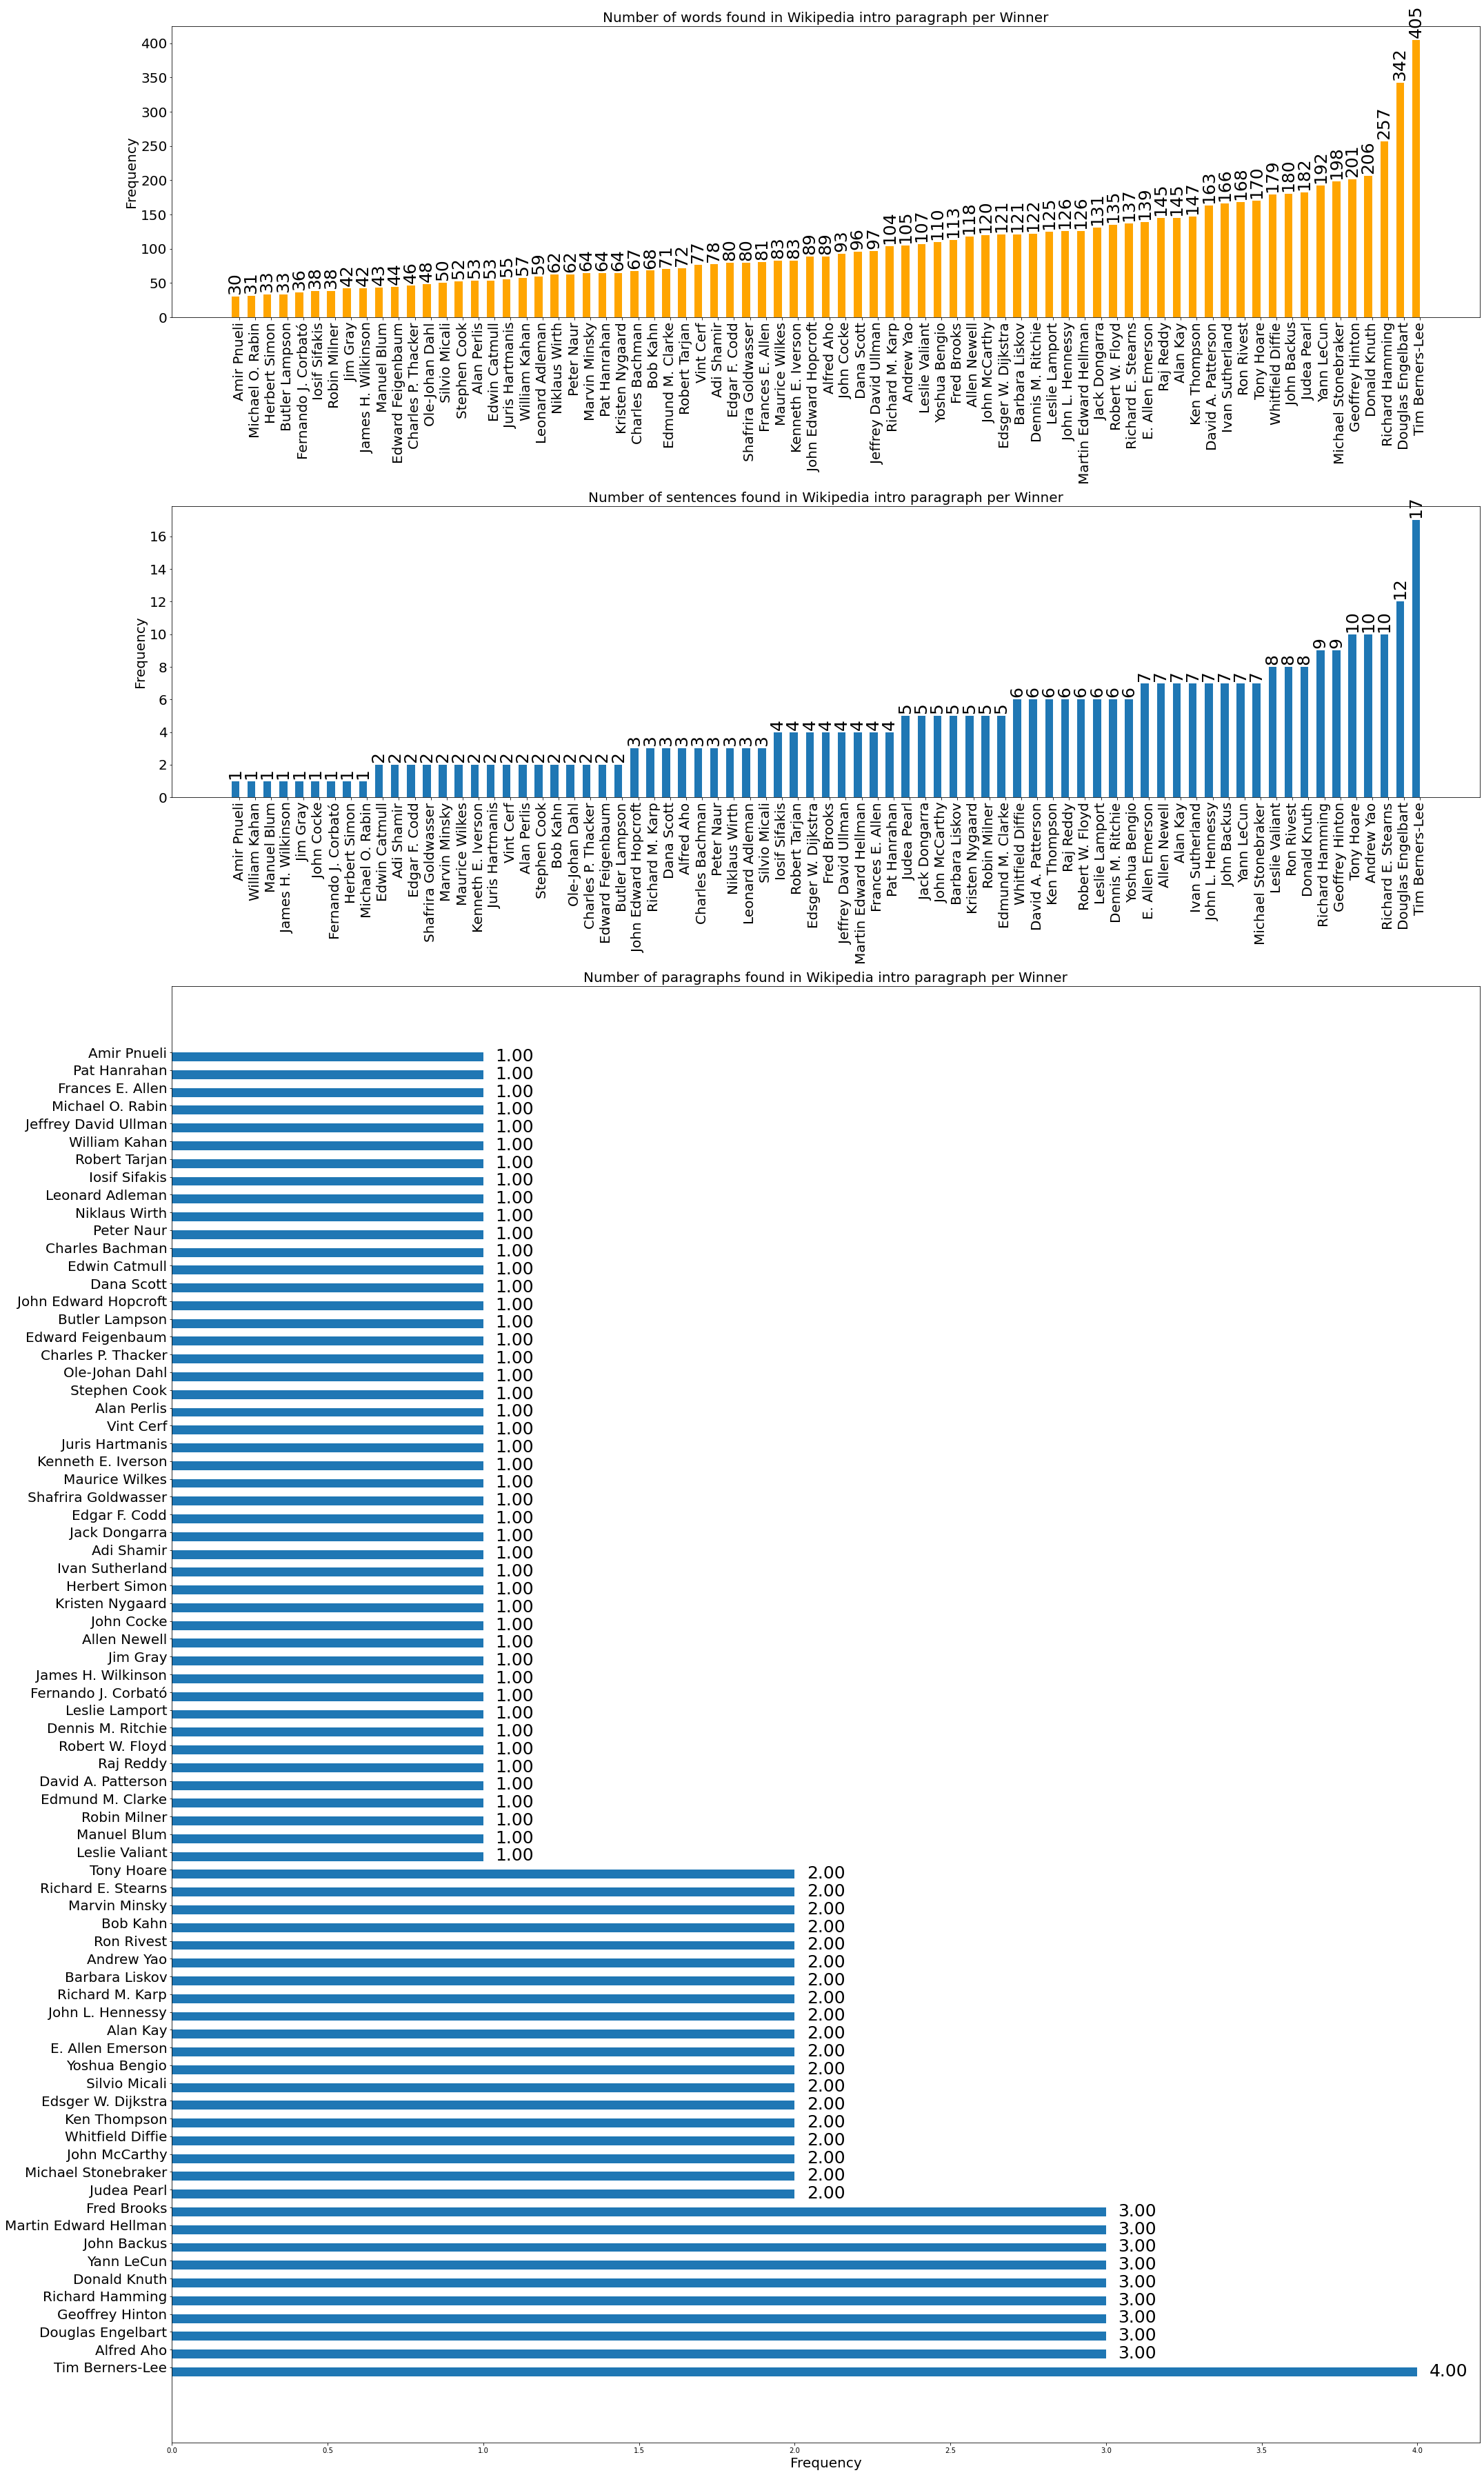

In [45]:
# For the bar anotation I used info from the following URLS: 
# https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
# https://stackoverflow.com/questions/42861049/horizontal-barplot-with-annotations/42865017

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 50), gridspec_kw={'height_ratios': [1, 1, 5]})

# Plot the count of words for each winner and apply the requested changes to the barplot
award_winners_intro = award_winners_intro.sort_values(by='count_words', ascending=True)  # Sort the dataset by the corresponding value to display in increasing order
x = np.arange(len(award_winners_intro['winner_name'])) # the label locations
width = 0.5 # the width of the bars
ax1.set_ylabel('Frequency', fontsize=20)
ax1.set_title('Number of words found in Wikipedia intro paragraph per Winner', fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels(award_winners_intro['winner_name'], rotation=90, fontsize=20)
pps = ax1.bar(x - width/2, award_winners_intro['count_words'], width, color = 'orange')
# Annotate the bars 
for p in pps:
    height = p.get_height()
    ax1.annotate('{}'.format(height), xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3), # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom', fontsize=25, rotation=90)
ax1.tick_params(axis='y', which='major', labelsize=20)


# Plot the count of sentences for each winner and apply the requested changes to the barplot
award_winners_intro = award_winners_intro.sort_values(by='count_sentences', ascending=True) # Sort the dataset by the corresponding value to display in increasing order
ax2.set_ylabel('Frequency', fontsize=20)
ax2.set_title('Number of sentences found in Wikipedia intro paragraph per Winner', fontsize=20)
ax2.set_xticks(x)
ax2.set_xticklabels(award_winners_intro['winner_name'], rotation=90, fontsize=20)
pps = ax2.bar(x - width/2, award_winners_intro['count_sentences'], width)
# Annotate the bars 
for p in pps:
    height = p.get_height()
    ax2.annotate('{}'.format(height), xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3), # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom', fontsize=25, rotation=90)
ax2.tick_params(axis='y', which='major', labelsize=20)

# Plot the count of paragraphs and apply the requested changes to the barplot
award_winners_intro = award_winners_intro.sort_values(by='count_paragraphs', ascending=False) # Sort the dataset by the corresponding value to display in increasing order
ax3.set_xlabel('Frequency', fontsize=20)
ax3.set_title('Number of paragraphs found in Wikipedia intro paragraph per Winner', fontsize=20)
ax3.set_yticks(x)
ax3.set_yticklabels(award_winners_intro['winner_name'] , fontsize=20)
pps = ax3.barh(x - width/2, award_winners_intro['count_paragraphs'], width)
# Annotate the bars           
for p in pps:
    width = p.get_width()
    plt.text(0.1+(p.get_width()), p.get_y()+0.55*p.get_height(), '{:1.2f}'.format(width), ha='center', va='center', fontsize=25)
ax3.tick_params(axis='y', which='major', labelsize=20)

plt.tight_layout()

## Heatmap of bigram frequencies

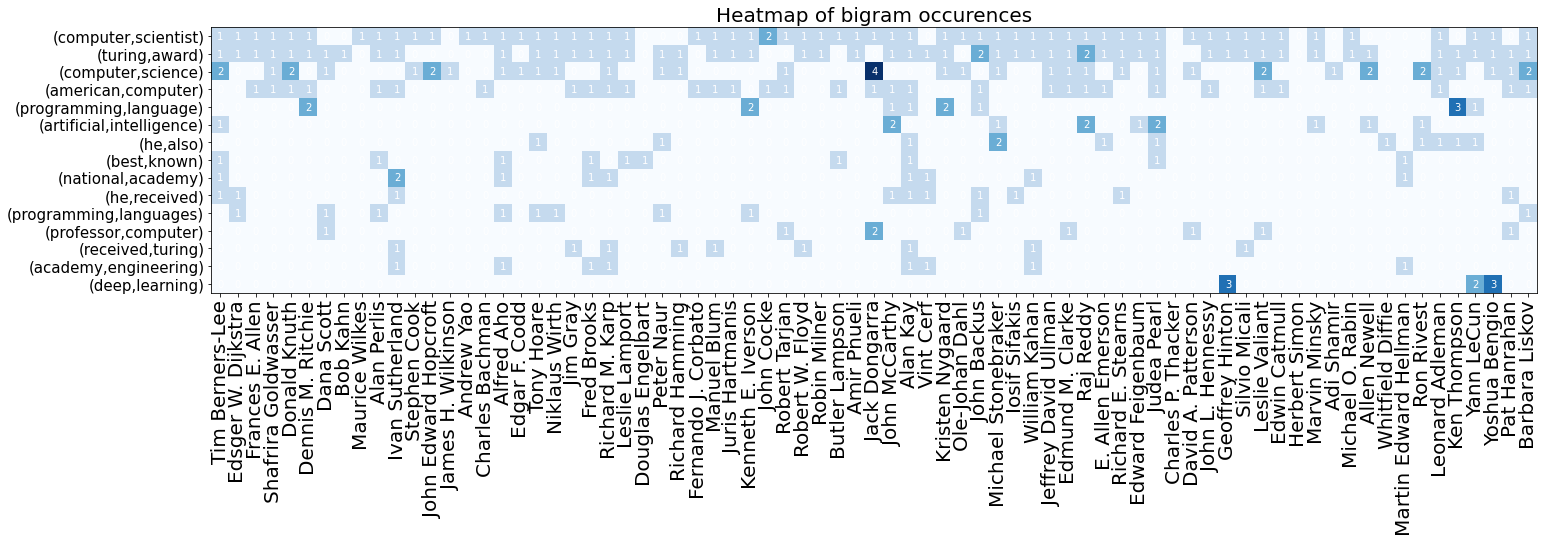

In [46]:
###################################################
########### HELPING FUNCTIONS AREA ################
###################################################


# Define a function which is going to perform the process the intro text for each ACM winner.
def bigrams_intro(text: str) ->dict:
    """
        Process the text and return a dict with the frequency of all bigrams in the text.
        In order to do that, we need to do the following steps:
     1) Remove HTML characters from each text
     2) Tokenize each text -> We are going to have a list of tokens for each row.
     3) Remove from each list the stop words and punctuation.
     4) Find all bigrams in the tokenized text
     5) Find distributions of bigrams
    
    :param text: The text to be processed of type `str`.
    :return: Dictionary with bigrams and frequencies of type `dict`.
    """
    bigram_freq = {} # Initialiaze our dictionary
    if text is not None:
        text           = remove_html_tags(text)      # Remove html characters in order not to inflate the results.
        tokenizer      = RegexpTokenizer(r'\w+')     # Do not include punctuation in the tokenization result.
        tokens         = tokenizer.tokenize(text)    # Tokenize the text.
        stopwords_list = stopwords.words('english')  # Get the English stop words
        word_list      = [word.lower() for word in tokens if word not in stopwords_list]  # Remove stop words
        bgs            = nltk.bigrams(word_list)  # Find bigrams 
        bigram_freq    = dict(nltk.FreqDist(bgs)) # Find the distribution of the bigrams
        return bigram_freq
    else:
        pass
    
    
def find_Frequency(winner_bigram_freq: dict, row_index:int) ->list:
    """ Find how many times each one of the top 15 bigrams is found 
    in the intro of the corresponding winner. 
    
    :param winner_bigram_freq: The dictionary of type `dict` which contains all the 
     bigrams of the specific winner with their corresponding frequencies.
    :row_index: Row index (of type `int`) for the heatmap_array which corresponds to the winner.
    :return: A `list` with how many times each bigram is found.
    """
    global heatmap_array, top_15_keys
    for col_index, value in enumerate(top_15_keys):  # For each top 15 bigram find how many times it exists in the intro
                                                     # and update the numpy array accordingly.
        try: # If this bigram exists in the intro update the counter.
            heatmap_array[row_index][col_index] = winner_bigram_freq[value]
        except:  # The specific bigram was not found in this intro.         
            pass
    
    
##########################################################
########### END OF HELPING FUNCTIONS AREA ################
##########################################################    



###############################################################
############ CREATE NUMPY DATAFRAME WITH RESULTS ##############
###############################################################

heatmap_df = copy.deepcopy(awards_intro[['winner_name','intro']])  # This dataframe will help us with the calculations
    
# This numpy array will store the frequencies for the heatmap.
heatmap_array = np.zeros((len(list(heatmap_df['winner_name'])), 15), dtype='i')  


# First we need to copy the top 15 bigrams into a new dictionary 
top_15_bigrams = {}
winners_bigrams_sorted = dict( sorted(winners_bigrams.items(), key=operator.itemgetter(1),reverse=True))
dict_keys = list(winners_bigrams_sorted.keys())
for i in range(0, 15):
    top_15_bigrams[dict_keys[i]] = winners_bigrams_sorted[dict_keys[i]]

# For every biggram in top_15_bigrams we need to calculate how many times it is found in each intro text of each winner
top_15_keys = list(top_15_bigrams.keys()) # Keep only the keys and not the frequencies.    

    
    
# In order to create the heatmap we need to transform our data to the appropriate form in order to plot them.
# For this specific plot we need to create numpy array where every row will correspond to a different award winner 
# and each column will correspond to a different bigram from the 15 most frequent bigram. Each cell will count the 
# frequency that each bigram occures in the intro of the corresponding award winner.
heatmap_df['bigrams'] = heatmap_df['intro'].apply(bigrams_intro)  # Create a new column which has all the dictionaries 
                                                                  # With all the bigrams and their frequencies for each winner.

heatmap_df = heatmap_df.reset_index(drop=True)
heatmap_df = heatmap_df.reset_index()  # Reset index and add it as a column because we are going to use it in the find_Frequency function.

# Apply function in order to fill the numpy array for the heatmap
heatmap_df.apply(lambda x: find_Frequency(x.bigrams, x['index']), axis=1)

##########################################################
################ PLot the heatmap ########################
##########################################################


# Create the heatmap
# For the heatmap I used code from this URL: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(heatmap_array.T, cmap="Blues")  # Plot the Heatmap and add the requested colormap

# Format the heatmap
X = list(heatmap_df['winner_name'])
Y = top_15_keys
# Create labels for Y axis for the bigrams
for index, element in enumerate(Y):
    Y[index] = '('+ element[0]+','+element[1]+')'


ax.set_title('Heatmap of bigram occurences', fontsize=20)
ax.set_yticks(np.arange(len(Y)))
ax.set_yticklabels(Y, fontsize=15)
ax.set_xticks(np.arange(len(X)))
ax.set_xticklabels(X, rotation=90, fontsize=20)



# Loop over data dimensions and create text annotations.
for i in range(len(Y)):
    for j in range(len(X)):
        text = ax.text(j, i, heatmap_array.T[i, j], ha="center", va="center", color="w")

fig.tight_layout()
fig = plt.gcf()
fig.set_size_inches(40, 30)
